# Processamento dos dados de mare e corrente da Capitania UNIMONTE

In [2]:
import os
import pandas as pd
import numpy as np
import pylab as pl
import espec
%matplotlib inline

In [3]:
pathname = os.environ['HOME'] + '/Dropbox/unimonte/dados_2015/'

dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')

mare = pd.read_csv(pathname + 'capitania_mare.csv', parse_dates=['date'],
                   date_parser=dateparse, index_col='date')

corr = pd.read_csv(pathname + 'capitania_corr.csv', parse_dates=['date'],
                   date_parser=dateparse, index_col='date')

In [4]:
#intervalo de amostragem
dt_mare = 10/60/24 #10 minutos
dt_corr = 5/60/24 #5 minutos

#frequencia de amostragem
fp_mare = 1.0 / dt_mare
fp_corr = 1.0 / dt_corr

In [5]:
#auto-espectro da mare e corrente
aam = espec.espec1(x=mare.alt, nfft=int(len(mare)/2), fs=fp_mare)
aac = espec.espec1(x=corr.int, nfft=len(corr), fs=fp_corr)

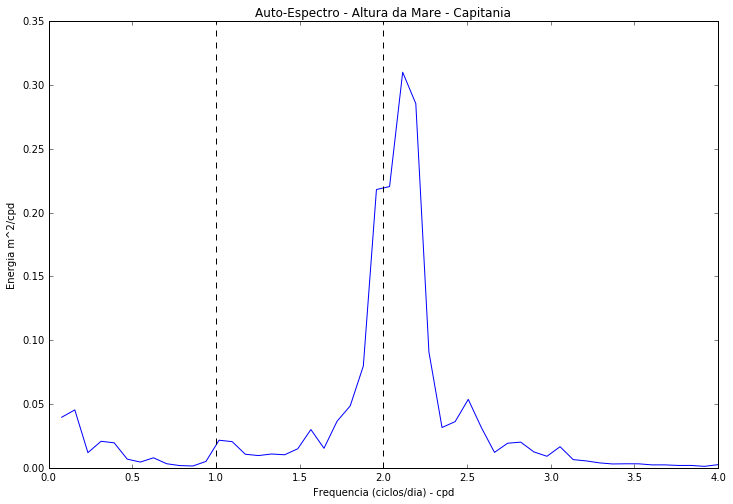

In [6]:
pl.figure(figsize=(12,8))
pl.plot(aam[:,0], aam[:,1])
pl.xlim(0,4)
pl.ylim(0,0.35)
pl.plot([2,2],[0,0.35],'k--')
pl.plot([1,1],[0,0.35],'k--')
pl.xlabel('Frequencia (ciclos/dia) - cpd')
pl.ylabel('Energia m^2/cpd')
pl.title('Auto-Espectro - Altura da Mare - Capitania')

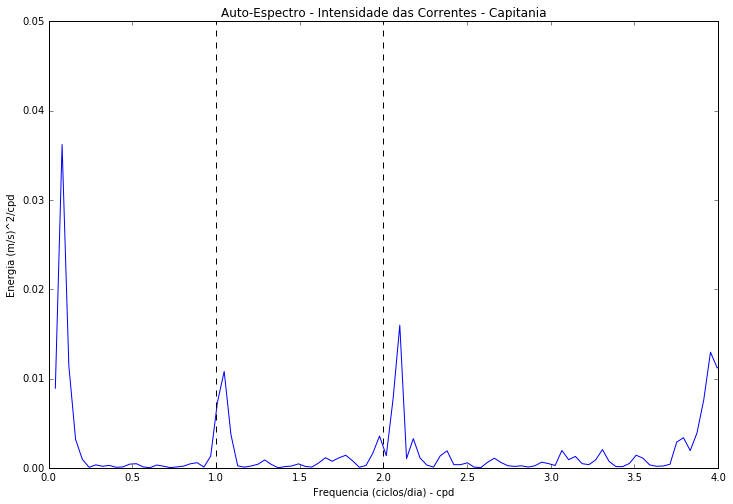

In [7]:
pl.figure(figsize=(12,8))
pl.plot(aac[:,0], aac[:,1])
pl.xlim(0,4)
pl.ylim(0,0.05)
pl.plot([2,2],[0,0.35],'k--')
pl.plot([1,1],[0,0.35],'k--')
pl.xlabel('Frequencia (ciclos/dia) - cpd')
pl.ylabel('Energia (m/s)^2/cpd')
pl.title('Auto-Espectro - Intensidade das Correntes - Capitania')

# Espectros cruzados

In [8]:
#interpolar os dados (deixar na mesma frequencia de amostragem e mesmo tamanho)


#interpola dados a cada 1 minuto
marei = mare.resample('1T').mean().bfill()
corri = corr.resample('1T').mean().bfill()[1:]

marei.shape, corri.shape

((40310, 1), (40310, 1))

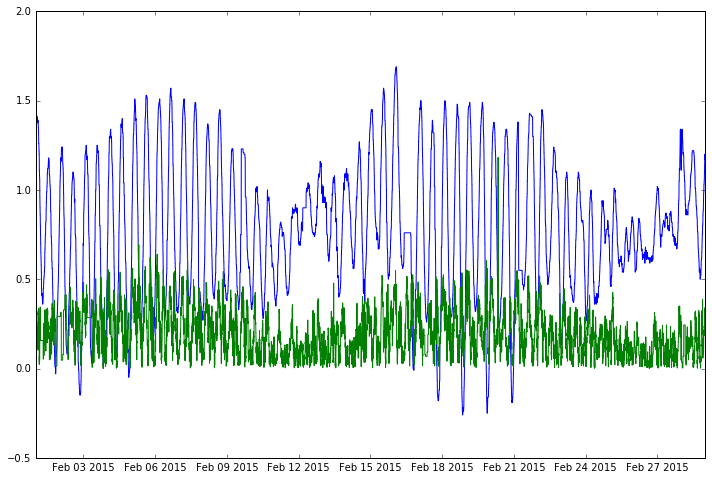

In [9]:
pl.figure(figsize=(12,8))
pl.plot(marei.index, marei.alt, corri.index, corri.int)

In [10]:
fsi = 1.0 / (1.0/60/24)
aa2 = espec.espec2(x=marei.alt, y=corri.int, nfft=int(len(marei)/2), fs=fsi)

/usr/local/python/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


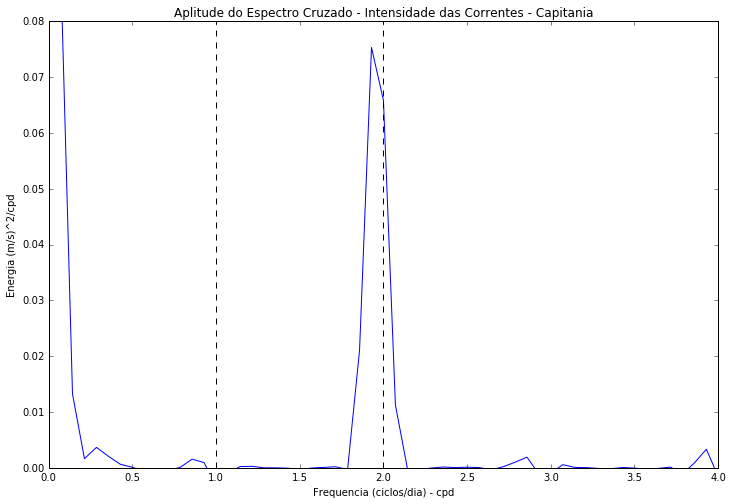

In [11]:
pl.figure(figsize=(12,8))
pl.plot(aa2[:,0], aa2[:,1])
pl.xlim(0,4)
pl.ylim(0,0.08)
pl.plot([2,2],[0,0.35],'k--')
pl.plot([1,1],[0,0.35],'k--')
pl.xlabel('Frequencia (ciclos/dia) - cpd')
pl.ylabel('Energia (m/s)^2/cpd')
pl.title('Aplitude do Espectro Cruzado - Intensidade das Correntes - Capitania')

/usr/local/python/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


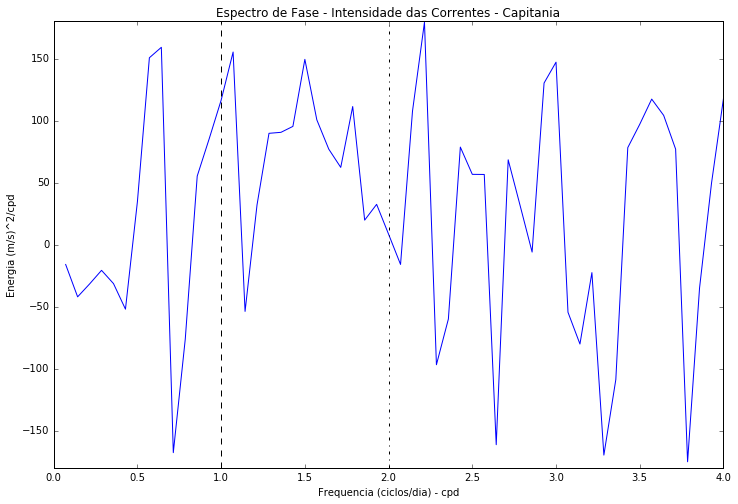

In [12]:
pl.figure(figsize=(12,8))
pl.plot(aa2[:,0], aa2[:,4])
pl.xlim(0,4)
pl.ylim(-180,180)
pl.plot([2,2],[-180,180],'k-.')
pl.plot([1,1],[-180,180],'k--')
pl.xlabel('Frequencia (ciclos/dia) - cpd')
pl.ylabel('Energia (m/s)^2/cpd')
pl.title('Espectro de Fase - Intensidade das Correntes - Capitania')

/usr/local/python/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


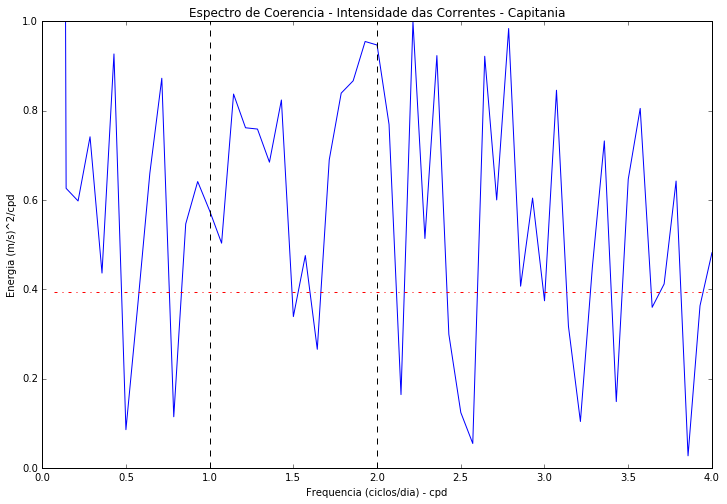

In [13]:
pl.figure(figsize=(12,8))
pl.plot(aa2[:,0], aa2[:,5])
pl.plot(aa2[:,0], aa2[:,8],'r-.')
pl.xlim(0,4)
pl.ylim(0,1)
pl.plot([2,2],[0,1],'k--')
pl.plot([1,1],[0,1],'k--')
pl.xlabel('Frequencia (ciclos/dia) - cpd')
pl.ylabel('Energia (m/s)^2/cpd')
pl.title('Espectro de Coerencia - Intensidade das Correntes - Capitania')